# Figure 3

In [2]:
import os
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

cwd = os.getcwd()
if cwd.endswith('notebook'):
    os.chdir('..')
    cwd = os.getcwd()

In [3]:
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)
plt.rcParams['font.family'] = 'Helvetica'

palette = sns.color_palette().as_hex()

data_folder = Path('./data')
assert data_folder.is_dir()

figures_folder = Path('./figures')
assert figures_folder.is_dir()

In [4]:
a_halodurans_accession = 'GCF_004376175.1'
p_endophyticus_accession = 'GCF_011326735.1'
v_salexigens_accession = 'GCF_014905415.1'

## Phage endolysins

In [58]:
p_endo = pd.read_csv(data_folder / 'virushostdb_phages_pgh_hits_hosts.csv', index_col='query')
p_endo['query_protein_id'] = [v.split('@')[0] for v in p_endo.index]
p_endo['query_accession'] = [v.split('@')[1].split('$')[0] for v in p_endo.index]
p_endo.head()

,target,pfam_domain,domain_type,normalized_score,rank,query_protein_id,query_accession
query,,,,,,,
AAZ82464.1@DQ113772$Amidase_2:16-152,WP_000350458.1@GCF_001457635.1,Amidase_2,catalytic,95.81,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:196-215,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,82.34,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:217-237,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,74.79,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:238-257,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,82.05,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:258-278,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,83.15,1,AAZ82464.1,DQ113772


### Keep best ranking domain per protein

Split by CWB vs catalytic domains.

In [59]:
pgh_domains = pd.read_csv(data_folder / 'pgh_domains.csv')
cw_binding_domains = sorted(pgh_domains[pgh_domains['kind'] == 'Cell wall binding']['short_name'].values)
catalytic_domains = sorted(pgh_domains[pgh_domains['kind'] == 'Catalytic']['short_name'].values)

cwb_scores = p_endo[
    p_endo['pfam_domain'].isin(cw_binding_domains)
].sort_values(['query_protein_id', 'rank']).drop_duplicates('query_protein_id')

cat_scores = p_endo[
    p_endo['pfam_domain'].isin(catalytic_domains)
].sort_values(['query_protein_id', 'rank']).drop_duplicates('query_protein_id')

### Plot rank

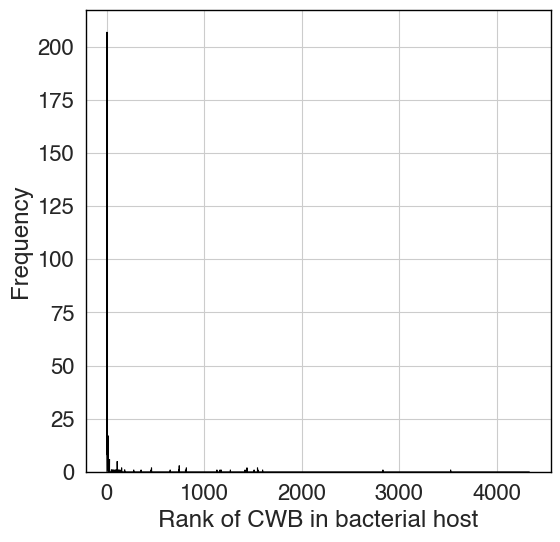

In [60]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

max_rank = cwb_scores['rank'].max()
bins = np.arange(0.5, max_rank, 1)
cwb_scores['rank'].hist(bins=bins, ax=ax, color='black', histtype='step');

ax.set_xlabel('Rank of CWB in bacterial host');
ax.set_ylabel('Frequency');

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'figure3' / 'phage_endolysins_cwb_rank.pdf', dpi=300, bbox_inches='tight', transparent=True);

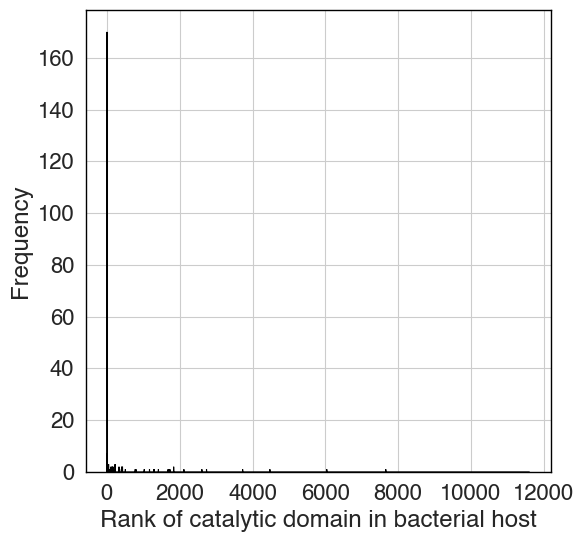

In [61]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

max_rank = cat_scores['rank'].max()
bins = np.arange(0.5, max_rank, 1)
cat_scores['rank'].hist(bins=bins, ax=ax, color='black', histtype='step');

ax.set_xlabel('Rank of catalytic domain in bacterial host');
ax.set_ylabel('Frequency');

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'figureS2' / 'phage_endolysins_cat_rank.pdf', dpi=300, bbox_inches='tight', transparent=True);

## Sequence vs structure similarity

Data generated with `src/run_target_search_sequence.sh` and `src/run_target_search_structures.sh`

In [5]:
rank_diff = pd.read_csv(data_folder / 'figure3' / 'h_salarium_target_ranks.csv')
rank_diff.head()

,query_organism,query_accession,query_protein_id,query_pfam_domain,query_start,query_end,target_accession,target_protein_id,domain,gtdb_phylum,gtdb_class,gtdb_order,gtdb_family,gtdb_genus,gtdb_species,ncbi_organism_name,rank_sequence,rank_structure,average_rank
0,Halogranum salarium B-1,GCF_000283335.1,WP_009365375.1,Glucosaminidase,67,181,GCF_000283335.1,WP_009365375.1,Archaea,Halobacteriota,Halobacteria,Halobacteriales,Haloferacaceae,Halogranum,Halogranum rubrum,Halogranum salarium B-1,1,1,1.0
1,Halogranum salarium B-1,GCF_000283335.1,WP_009365375.1,Glucosaminidase,67,181,GCF_900156425.1,WP_175609653.1,Archaea,Halobacteriota,Halobacteria,Halobacteriales,Haladaptataceae,Haladaptatus,Haladaptatus litoreus,Haladaptatus litoreus,2,2,2.0
2,Halogranum salarium B-1,GCF_000283335.1,WP_009365375.1,Glucosaminidase,67,181,GCF_023074835.1,WP_247418429.1,Archaea,Halobacteriota,Halobacteria,Halobacteriales,Haloarculaceae,Halomarina,Halomarina salina,Halomarina salina,5,3,4.0
3,Halogranum salarium B-1,GCF_000283335.1,WP_009365375.1,Glucosaminidase,67,181,GCF_020700235.1,WP_265338400.1,Archaea,Halobacteriota,Halobacteria,Halobacteriales,Haladaptataceae,Haladaptatus,Haladaptatus pallidirubidus,Haladaptatus pallidirubidus,4,4,4.0
4,Halogranum salarium B-1,GCF_000283335.1,WP_009365375.1,Glucosaminidase,67,181,GCF_002844195.1,WP_143423131.1,Archaea,Halobacteriota,Halobacteria,Halobacteriales,Haloferacaceae,Halegenticoccus,Halegenticoccus soli,Halegenticoccus soli,3,6,4.5


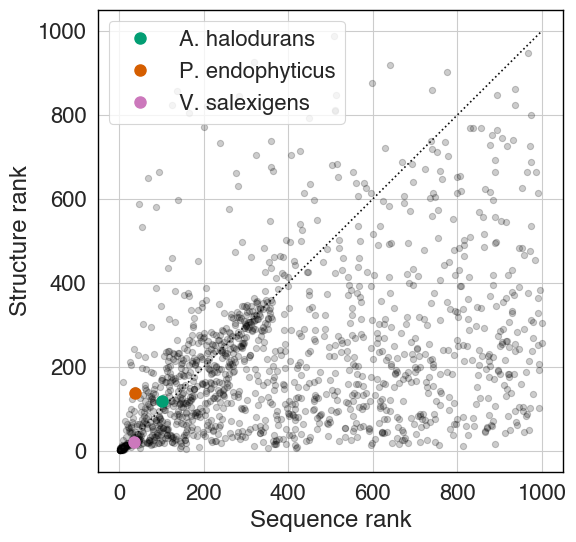

In [7]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
rank_diff.plot.scatter(x='rank_sequence', y='rank_structure', ax=ax, alpha=0.2, color='black');

ax.plot(range(0, 1001), range(0, 1001), ':', color='#111111')

ix = 0
for target_accession, target_name in [
    (a_halodurans_accession, 'A. halodurans'), 
    (p_endophyticus_accession, 'P. endophyticus'), 
    (v_salexigens_accession, 'V. salexigens')
]:
    ix += 1
    df = rank_diff[rank_diff['target_accession'] == target_accession]
    if len(df) > 0:
        series = df.iloc[df['average_rank'].abs().argmin()]

        x = series.rank_sequence
        y = series.rank_structure

        ax.plot(x, y, 'o', markersize=8, color=palette[ix+1], label=target_name)

ax.set_xlabel('Sequence rank')
ax.set_ylabel('Structure rank')
ax.legend();
ax.grid(True);

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'sequence_vs_structural_rank_h_salarium.pdf', dpi=300, bbox_inches='tight', transparent=True);

## Colony Forming Units

In [51]:
# Plates used for counting are available on figure S3: https://www.biorxiv.org/content/biorxiv/early/2024/09/18/2024.09.18.613068/F7.large.jpg
# Counting was performed with ImageJ with protocol: https://dx.doi.org/10.17504/protocols.io.f2mbqc6
cfu_data = {
    'A. halodurans': {
        'control': [38, 72],
        'J2ZZK6': [0, 0],
        'J2ZJU5': [0, 0],
    },
    'P. endophyticus': {
        'control': [14, 7],
        'J2ZZK6': [21, 3],
        'J2ZJU5': [11, 31],
    },
    'V. salexigens': {
        'control': [842, 719],
        'J2ZZK6': [488, 617],
        'J2ZJU5': [643, 553],
    },
}

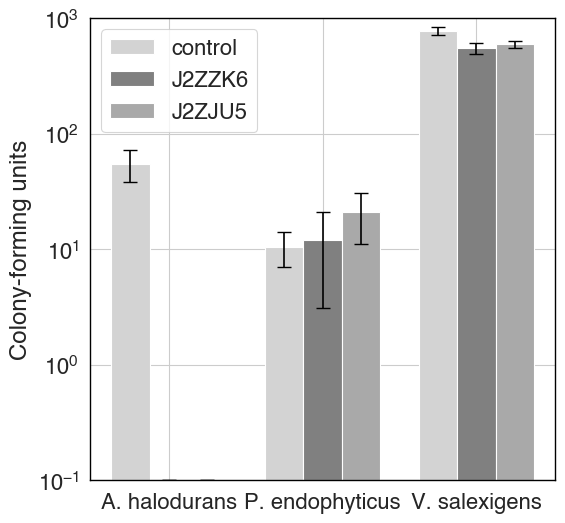

In [54]:
groups = list(cfu_data.keys())
conditions = list(cfu_data[groups[0]].keys())
means = []
errors = []

colors = ['lightgrey', 'grey', 'darkgrey']

for group in groups:
    group_means = []
    group_errors = []
    for condition in conditions:
        values = cfu_data[group][condition]
        mean = np.mean(values)
        std = np.std(values)
        group_means.append(mean)
        group_errors.append(std)
    means.append(group_means)
    errors.append(group_errors)

means = np.array(means)
errors = np.array(errors)

# Plotting
x = np.arange(len(groups))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot each condition
for i, condition in enumerate(conditions):
    ax.bar(x + i*width, means[:, i], width, label=condition, yerr=errors[:, i], capsize=5, color=colors[i], bottom=1e-1)

for spine in ax.spines.values():
    spine.set_edgecolor('black')

ax.set_ylabel('Colony-forming units')
ax.set_xticks(x + width)
ax.set_xticklabels(groups)
ax.set_yscale('log')
ax.set_ylim(None, 1e3)
ax.legend();

f.savefig(figures_folder / 'figure3' / 'CFU.pdf', dpi=300, bbox_inches='tight', transparent=True);

## Phylum enrichment

See `notebook/figureS2.ipynb` – the figure moved from S2 to 3E but the code is staying on the other file because it is referenced in the preprint.